In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
cd /content/drive/MyDrive/class/lecture01_10

/content/drive/MyDrive/class/lecture01_10


In [2]:
!unzip archive.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jpg  
  inflating

### 라이브러리 호출

In [3]:
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, BatchNormalization, MaxPool2D, AvgPool2D, Dropout

### 정규화

In [4]:
img_gen = ImageDataGenerator(rescale = 1 / 255)

### 데이터 분리

#### 이미지 제너레이터 라이브러리를 이용 하여 이미지 리사이징
 - train : 14034, 6
 - test : 3000, 6

In [7]:
train_loader = img_gen.flow_from_directory(
    directory = "seg_train/seg_train", target_size = (150,150),
    batch_size = 64, seed = 42
)

Found 14034 images belonging to 6 classes.


In [8]:
test_loader = img_gen.flow_from_directory(
    directory = "seg_test/seg_test", target_size = (150,150),
    batch_size = 64, seed = 42
)

Found 3000 images belonging to 6 classes.


### 데이터 분류 변경

In [14]:
train_loader.class_indices.items()

dict_items([('buildings', 0), ('forest', 1), ('glacier', 2), ('mountain', 3), ('sea', 4), ('street', 5)])

In [11]:
test_loader.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [16]:
item = {val : key for key, val in train_loader.class_indices.items()}

In [17]:
item

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [38]:
from keras.optimizers import Adam

In [39]:
optimizer = Adam(learning_rate = 0.0005, decay = 1e-6)

In [40]:
model = Sequential()

# CONV1
model.add(Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(5,5))

# CONV2
model.add(Conv2D(180,kernel_size=(3,3),activation='relu'))

# CONV3
model.add(Conv2D(140,kernel_size=(3,3),activation='relu'))

# CONV4
model.add(Conv2D(100,kernel_size=(3,3),activation='relu'))

# CONV5
model.add(Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(5,5))

# FC
model.add(Flatten())
model.add(Dense(180,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(6,activation='softmax'))

In [47]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 200)     5600      
                                                                 
 conv2d_19 (Conv2D)          (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 29, 29, 180)      0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 27, 27, 180)       291780    
                                                                 
 conv2d_21 (Conv2D)          (None, 25, 25, 140)       226940    
                                                                 
 conv2d_22 (Conv2D)          (None, 23, 23, 100)       126100    
                                                      

In [48]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [49]:
reLR = ReduceLROnPlateau(monitor = "val_loss", patience=20,verbose=1,factor=0.5)
es = EarlyStopping(monitor = "val_loss", patience=30, verbose=1)
mc = ModelCheckpoint('best_cvision.h5', save_best_only=True, verbose=1) 

In [50]:
hist = model.fit(train_loader, epochs = 20, validation_data=test_loader, verbose = 2,callbacks=[es,mc,reLR])

Epoch 1/20

Epoch 1: val_loss improved from inf to 1.10097, saving model to best_cvision.h5
220/220 - 162s - loss: 1.4058 - accuracy: 0.4211 - val_loss: 1.1010 - val_accuracy: 0.5657 - lr: 1.0000e-04 - 162s/epoch - 736ms/step
Epoch 2/20

Epoch 2: val_loss improved from 1.10097 to 0.93776, saving model to best_cvision.h5
220/220 - 154s - loss: 1.1242 - accuracy: 0.5512 - val_loss: 0.9378 - val_accuracy: 0.6513 - lr: 1.0000e-04 - 154s/epoch - 700ms/step
Epoch 3/20

Epoch 3: val_loss improved from 0.93776 to 0.85038, saving model to best_cvision.h5
220/220 - 154s - loss: 0.9988 - accuracy: 0.6220 - val_loss: 0.8504 - val_accuracy: 0.6830 - lr: 1.0000e-04 - 154s/epoch - 701ms/step
Epoch 4/20

Epoch 4: val_loss improved from 0.85038 to 0.78001, saving model to best_cvision.h5
220/220 - 155s - loss: 0.9083 - accuracy: 0.6599 - val_loss: 0.7800 - val_accuracy: 0.7170 - lr: 1.0000e-04 - 155s/epoch - 704ms/step
Epoch 5/20

Epoch 5: val_loss improved from 0.78001 to 0.69693, saving model to best

In [54]:
train_loss = hist.history["loss"]
train_acc = hist.history["accuracy"]
test_loss = hist.history["val_loss"]
test_acc = hist.history["val_accuracy"]

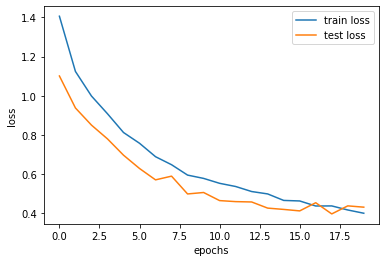

In [56]:
plt.plot(range(20),train_loss, label = "train loss")
plt.plot(range(20), test_loss, label = "test loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

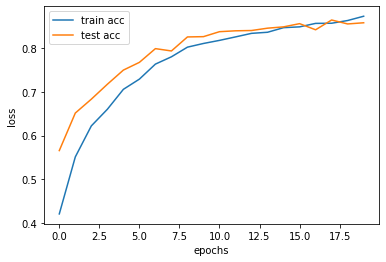

In [189]:
plt.plot(range(20),train_acc, label = "train acc")
plt.plot(range(20), test_acc, label = "test acc")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [58]:
import os

In [64]:
pred_list = [f'seg_pred/seg_pred/{i}' for i in os.listdir("seg_pred/seg_pred")]

In [65]:
pred_list[0]

'seg_pred/seg_pred/10004.jpg'

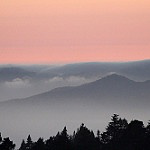

In [200]:
img = Image.open(pred_list[12])
display(img)

In [201]:
img = img.resize((150,150))

In [202]:
img_arr = np.array(img)

In [203]:
img_arr = img_arr[np.newaxis, :]

In [204]:
img_arr = img_arr.astype("float")

In [205]:
img_arr = img_gen.standardize(img_arr)

In [206]:
probability = model(img_arr)

In [207]:
pred = np.argmax(probability)

In [208]:
item[pred]

'mountain'